In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from IPython.display import display


In [111]:
df = pd.read_csv("solarpower_cumuldaybyday2.csv", sep=",")
df.drop(["Unnamed: 2"], axis=1, inplace=True)
df.head(2)

,date,cum_power
0,26/10/2011,0.1
1,27/10/2011,10.2


In [112]:
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")
df.head(2)

,date,cum_power
0,2011-10-26,0.1
1,2011-10-27,10.2


In [113]:
df = df.set_index(pd.DatetimeIndex(df["date"]))
df.drop(["date"], axis=1, inplace=True)
display(df.iloc[1:3])
display(df.iloc[-2:])

,cum_power
date,
2011-10-27,10.2
2011-10-28,20.2


,cum_power
date,
2018-10-25,28117.0
2018-10-26,28120.0


Постройте ряд еженедельного производства энергии, вычислив приращения полученного недельного ряда. В поле для ответа введите значение произведенной энергии за неделю с 6 по 12 октября 2014, округлив до целых.



In [127]:
# группировка по неделям, last - последнее значение в ряду, diff - разница от предыдущего элемента ряда
diff_by_week = df.resample("W").last().diff().copy()
diff_by_week.loc[date(2014, 10, 12)]
# тоже самое, что и
# df.resample("W").last().loc[date(2014,10,12)] - df.resample("W").last().loc[date(2014,10,5)]


cum_power    44.0
Name: 2014-10-12 00:00:00, dtype: float64

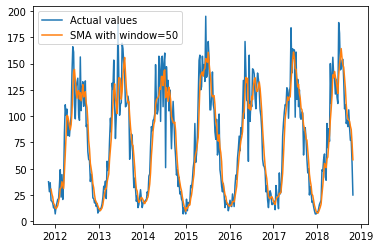

In [128]:
result = diff_by_week.rolling(window=4).mean()
plt.plot(diff_by_week, label="Actual values")
plt.plot(result, label="SMA with window=50")
plt.legend(loc="upper left")
plt.show()

Сколько числовых элементов в ряде скользящего среднего?

In [129]:
# dropna нужен так как N=window первых элементов получатся NaN
len(diff_by_week.rolling(window=4).mean().dropna())

362

Найдите значение ряда скользящего среднего с шириной окна 4 для t=120.

In [134]:
diff_by_week.rolling(window=4).mean().iloc[119]

cum_power    21.5
Name: 2014-02-09 00:00:00, dtype: float64